In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/BI/Global YouTube Statistics.csv'

df = pd.read_csv(file_path, encoding='latin1')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [ ]:
df['Youtuber'] = df['Youtuber'].str.lower().str.strip()
df = df[~df['Youtuber'].str.contains('youtube')]
df = df[df['video views'] != 0]
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,t-series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,mrbeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,cocomelon - nursery rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,set india,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,like nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,migos atl,12400000,6.993406e+09,Music,Migos ATL,99,United States,US,Entertainment,...,100000.0,2012.0,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
990,991,natan por aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,free fire india official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,994,robtopgames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [ ]:
label_encoder = LabelEncoder()

df['Youtuber'] = label_encoder.fit_transform(df['Youtuber'])
df['category'] = label_encoder.fit_transform(df['category'])
df['Title'] = label_encoder.fit_transform(df['Title'])
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Abbreviation'] = label_encoder.fit_transform(df['Abbreviation'])
df['channel_type'] = label_encoder.fit_transform(df['channel_type'])
df['created_month'] = label_encoder.fit_transform(df['created_month'])

df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,431,245000000,2.280000e+11,8,405,20082,14,18,8,...,2000000.0,2006.0,7,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,317,166000000,2.836884e+10,3,297,741,39,38,4,...,8000000.0,2012.0,3,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,86,162000000,1.640000e+11,2,83,966,39,38,3,...,1000000.0,2006.0,11,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,391,159000000,1.480000e+11,14,362,116536,14,18,4,...,1000000.0,2006.0,11,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,267,106000000,9.047906e+10,11,254,493,26,30,11,...,100000.0,2016.0,4,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,301,12400000,6.993406e+09,8,285,99,39,38,4,...,100000.0,2012.0,4,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
990,991,323,12300000,9.029610e+09,15,306,1200,3,4,4,...,700000.0,2017.0,3,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,162,12300000,1.674410e+09,11,152,1500,14,18,6,...,300000.0,2018.0,11,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,994,378,12300000,3.741235e+08,5,353,39,32,32,6,...,100000.0,2012.0,8,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


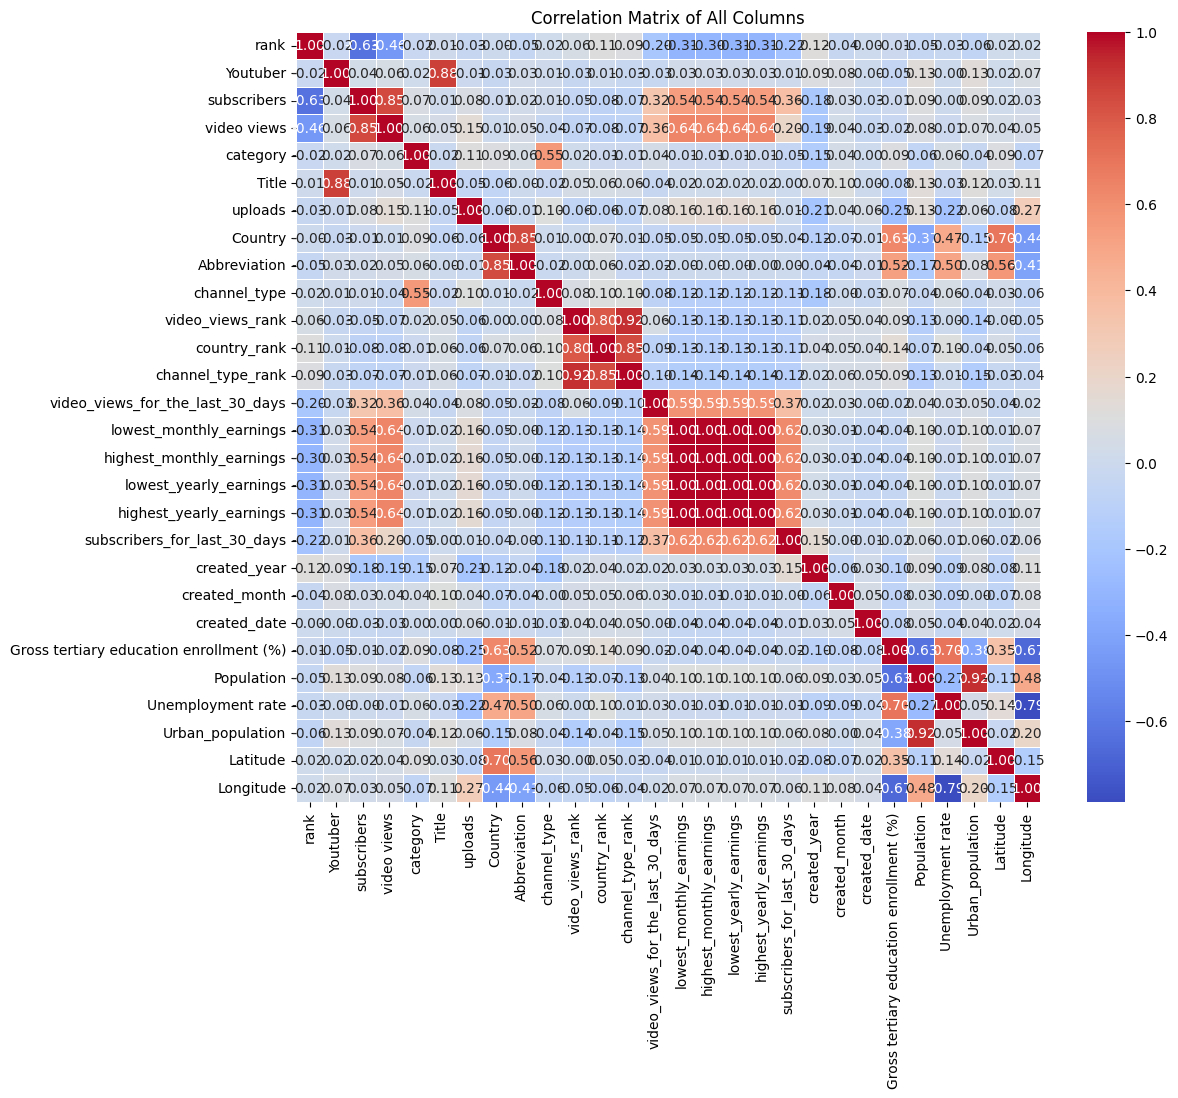

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of All Columns')
plt.yticks(rotation=0)

plt.show()

In [ ]:
df.shape

(553, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     553 non-null    int64  
 1   Youtuber                                 553 non-null    int64  
 2   subscribers                              553 non-null    int64  
 3   video views                              553 non-null    float64
 4   category                                 553 non-null    int64  
 5   Title                                    553 non-null    int64  
 6   uploads                                  553 non-null    int64  
 7   Country                                  553 non-null    int64  
 8   Abbreviation                             553 non-null    int64  
 9   channel_type                             553 non-null    int64  
 10  video_views_rank                         553 non-null  

In [ ]:
tables_to_drop = ['rank',
                  'Youtuber',
                  'Abbreviation',
                  'video_views_rank',
                  'country_rank',
                  'channel_type_rank',
                  'video_views_for_the_last_30_days',
                  'lowest_monthly_earnings',
                  'highest_monthly_earnings',
                  'lowest_yearly_earnings',
                  'subscribers_for_last_30_days',
                  'created_year',
                  'created_month',
                  'created_date',
                  'Gross tertiary education enrollment (%)',
                  'Unemployment rate',
                  'Urban_population',
                  'Latitude',
                  'Longitude',
                  'Title',
                  'Country',
                  'Population',
                  'category'
                  ]
df.drop(tables_to_drop, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 0 to 994
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   subscribers              553 non-null    int64  
 1   video views              553 non-null    float64
 2   uploads                  553 non-null    int64  
 3   channel_type             553 non-null    int64  
 4   highest_yearly_earnings  553 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 25.9 KB


In [ ]:
ms = MinMaxScaler()
df_scaled = ms.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,subscribers,video views,uploads,channel_type,highest_yearly_earnings
0,1.000000,1.000000,0.066646,0.615385,0.980108
1,0.660507,0.124425,0.002456,0.307692,0.584991
2,0.643318,0.719298,0.003203,0.230769,0.857143
3,0.630425,0.649123,0.386765,0.307692,0.791139
4,0.402664,0.396838,0.001633,0.846154,0.020796


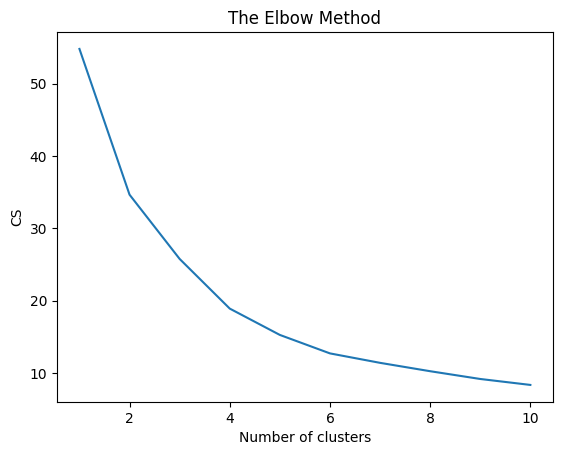

In [ ]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[0.11780026, 0.13473359, 0.09784232, 0.28671329, 0.45317552],
       [0.03879298, 0.044528  , 0.02566712, 0.28807225, 0.06011606],
       [0.04087967, 0.04004382, 0.01010845, 0.88522589, 0.06735575],
       [0.04561667, 0.05786038, 0.69542427, 0.65769231, 0.09303797],
       [0.05351041, 0.05529011, 0.0136906 , 0.57754011, 0.06441412],
       [0.75791434, 0.78947368, 0.15220467, 0.38461538, 0.8761302 ]])

In [ ]:
kmeans.inertia_

12.688236961643067

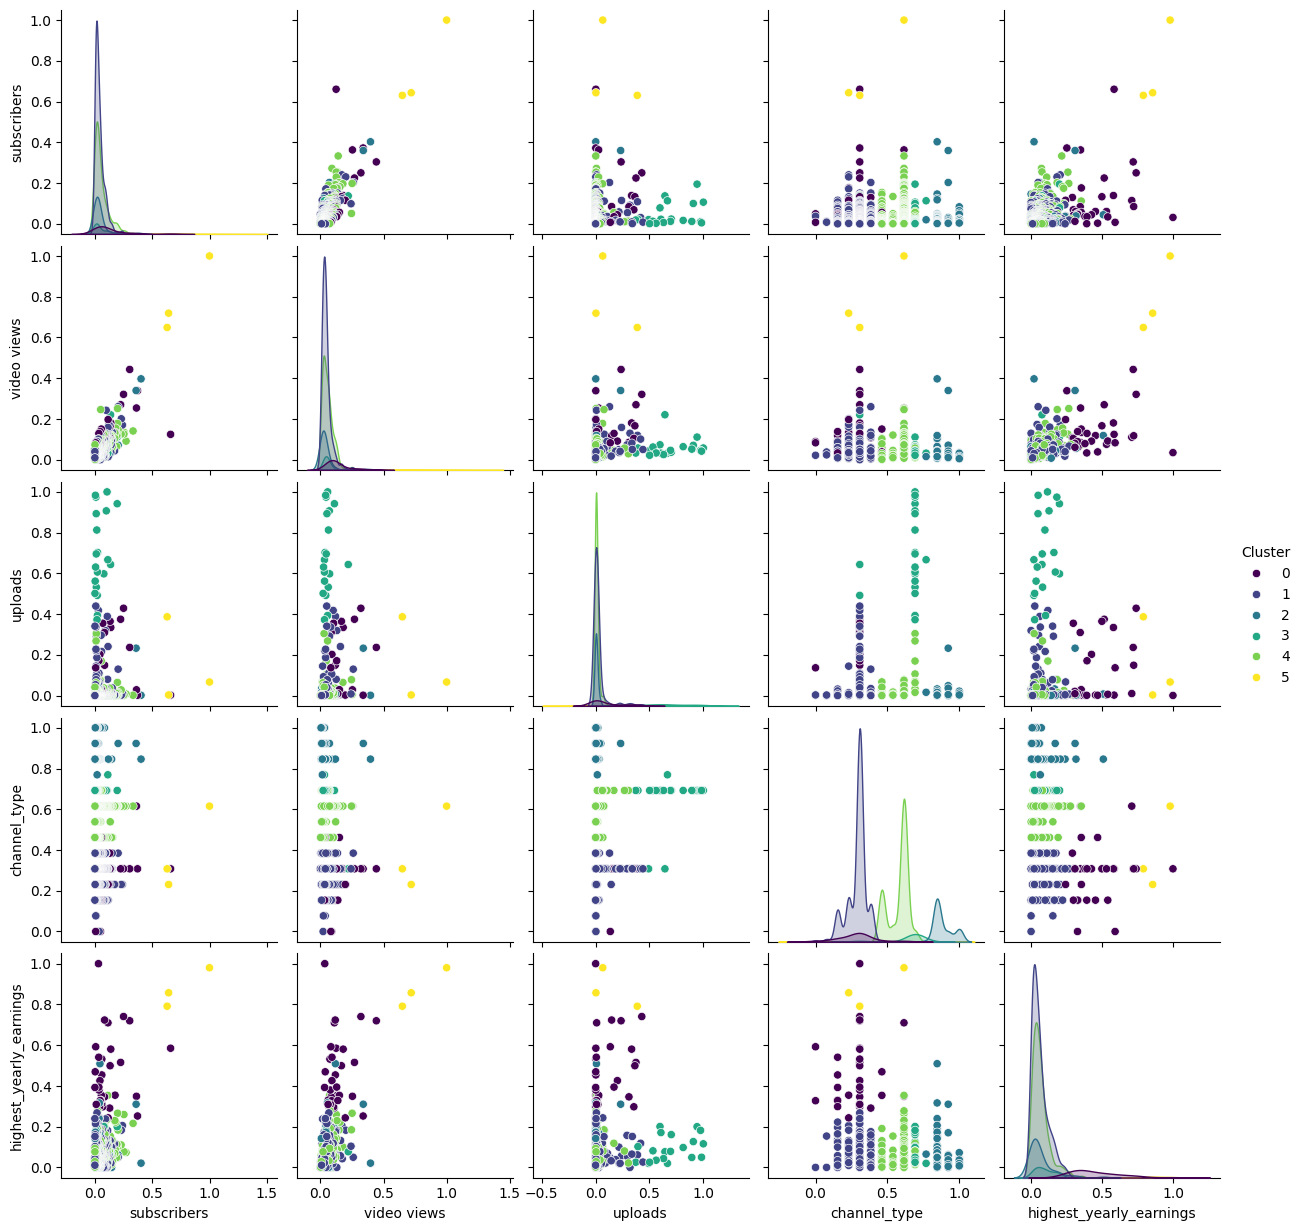

In [ ]:
labels = kmeans.labels_
df_clustered = pd.concat([df_scaled, pd.Series(labels, name='Cluster')], axis=1)

# Pairwise plotting with hue='Cluster' to visualize clusters
sns.pairplot(df_clustered, hue='Cluster', palette='viridis')
plt.show()


In [ ]:
df['Cluster'] = kmeans.labels_

earning_stats = df.groupby('Cluster')['highest_yearly_earnings'].agg(['mean', 'median', 'std'])

highest_earning_cluster = earning_stats['mean'].idxmax()
highest_earning_stats = earning_stats.loc[highest_earning_cluster]

print("Cluster with Highest Earnings:")
print("Cluster:", highest_earning_cluster)
print(highest_earning_stats)

Cluster with Highest Earnings:
Cluster: 5
mean      9.690000e+07
median    9.480000e+07
std       1.060707e+07
Name: 5, dtype: float64


In [ ]:
df_original = pd.read_csv(file_path, encoding='latin1')

label_encoder_channel = LabelEncoder()
df_original['channel_type_encoded'] = label_encoder_channel.fit_transform(df_original['channel_type'])

cluster_5_df = df[df['Cluster'] == 5]
numerical_channel_types_cluster_5 = cluster_5_df['channel_type'].unique()
original_channel_types = label_encoder_channel.inverse_transform(numerical_channel_types_cluster_5)

print("Original channel types in Cluster 5:")
for num_channel_type, original_channel_type in zip(numerical_channel_types_cluster_5, original_channel_types):
    print(f"Numerical value {num_channel_type} corresponds to original channel type {original_channel_type}")

Original channel types in Cluster 5:
Numerical value 8 corresponds to original channel type Music
Numerical value 3 corresponds to original channel type Education
Numerical value 4 corresponds to original channel type Entertainment
